In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn import tree
import os
import numpy as np

In [15]:

parks = pd.read_csv('../data/DataForML.csv')


parks.head()

,Unnamed: 0,Park_Name,Death Total,activities,deaths
0,0,Abraham Lincoln Birthplace National Historical...,0,"['Astronomy', 'Stargazing', 'Food', 'Picnickin...",0
1,1,Acadia National Park,17,"['Arts and Culture', 'Cultural Demonstrations'...",1
2,2,Adams National Historical Park,0,"['Guided Tours', 'Living History', 'First Pers...",0
3,3,African American Civil War Memorial,0,"['Guided Tours', 'Self-Guided Tours - Walking']",0
4,4,African Burial Ground National Monument,0,"['Arts and Culture', 'Guided Tours', 'Junior R...",0


In [16]:
res = [''.join(ele) for ele in parks["activities"]]

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
# vectorizing the words and creating stop words and minimum occurnace 
vectorizer = CountVectorizer(min_df = 50, stop_words=["and","on","or","self"])
X = vectorizer.fit_transform(res)

print(vectorizer.get_feature_names())

print(X.toarray())

['arts', 'astronomy', 'atv', 'auto', 'backcountry', 'biking', 'birdwatching', 'boating', 'bookstore', 'camping', 'canoeing', 'car', 'country', 'cross', 'cultural', 'culture', 'demonstration', 'demonstrations', 'driving', 'exhibits', 'film', 'fishing', 'food', 'freshwater', 'front', 'gathering', 'gift', 'group', 'guided', 'hands', 'hiking', 'historic', 'history', 'horse', 'horseback', 'hunting', 'junior', 'kayaking', 'living', 'museum', 'paddling', 'park', 'picnicking', 'program', 'ranger', 'riding', 'road', 'rv', 'scenic', 'shop', 'shopping', 'skiing', 'snowshoeing', 'souvenirs', 'stargazing', 'store', 'swimming', 'tours', 'trekking', 'walking', 'watching', 'weapons', 'wildlife']
[[0 1 0 ... 1 0 1]
 [1 1 0 ... 1 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 1]
 [1 1 0 ... 1 0 1]]


In [18]:
from sklearn.model_selection import train_test_split
# creating test and train sets
y = parks["deaths"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# running decision tree 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8717948717948718

In [20]:
# running random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8888888888888888

In [21]:
# creating indices for finding activities 
importances = rf.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

sorted_indices

array([ 9, 21, 40,  5,  4,  7, 33, 30, 56, 28, 11, 12, 37, 39, 19, 57,  3,
        2, 18, 41, 51, 58,  0, 48, 10, 47, 24, 45, 27, 59, 54, 46,  1, 25,
        6, 15, 35, 49, 26, 52, 20, 34, 32, 23, 42, 22, 60, 62, 29, 53, 38,
        8, 44, 43, 50, 36, 13, 55, 17, 14, 31, 61, 16], dtype=int64)

In [22]:
# selecting the important features
important_features_dict = {}
for idx, val in enumerate(rf.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print(f'15 most important features: {important_features_list[:15]}')


a_list = vectorizer.get_feature_names()
selectionList = important_features_list[:15]
selectedElements = []
for index in selectionList:

    selectedElements.append(a_list[index])

print(selectedElements)

15 most important features: [9, 21, 40, 5, 4, 7, 33, 30, 56, 28, 11, 12, 37, 39, 19]
['camping', 'fishing', 'paddling', 'biking', 'backcountry', 'boating', 'horse', 'hiking', 'swimming', 'guided', 'car', 'country', 'kayaking', 'museum', 'exhibits']


In [23]:
# creating indeces for chart
importances = rf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

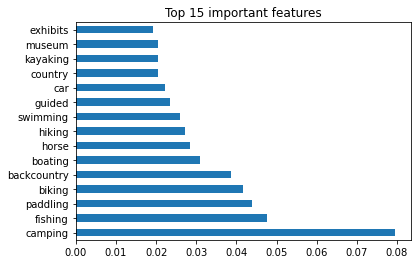

<Figure size 432x288 with 0 Axes>

In [24]:
# plotting top 15 activities based on importance
feat_importances = pd.Series(rf.feature_importances_, index=a_list)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()